In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
data = pd.read_excel('Data Files\lrm.xlsx')

In [3]:
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


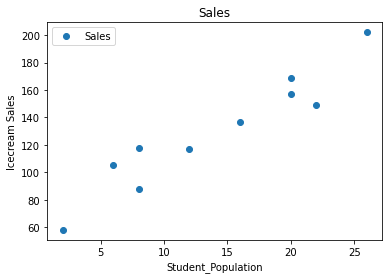

In [5]:
data.plot('Student_Population', 'Sales', style='o')
plt.ylabel('Icecream Sales')
plt.title('Sales')
plt.show()

In [7]:
import statsmodels.api as s
St_pop = data['Student_Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = s.OLS(sales, st_pop)
result1 = model1.fit()
result1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        20:54:52   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x = data['Student_Population'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

In [9]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [10]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In the ice-cream vendor example, the estimated regression equation $yhat = 60 + 5x$ provides an estimate of the relationship between the size of the student population x and quarterly sales y. 

In [13]:
# Point estimate
reg.predict([[10]])

array([[110.]])

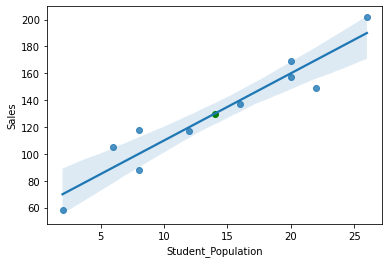

In [15]:
x = data['Student_Population']
y = data['Sales']

plt.figure()
sns.regplot(x=x, y=y, fit_reg=True)
plt.scatter(np.mean(x), np.mean(y), color='green')

#### Prediction Interval

In [42]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(result1, alpha=0.05)
fitted_values = data1[:, 2]
predict_mean_se = data1[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4:6].T
predict_ci_low, predict_ci_upp = data1[:, 6:8].T

In [43]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [44]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [45]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [46]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


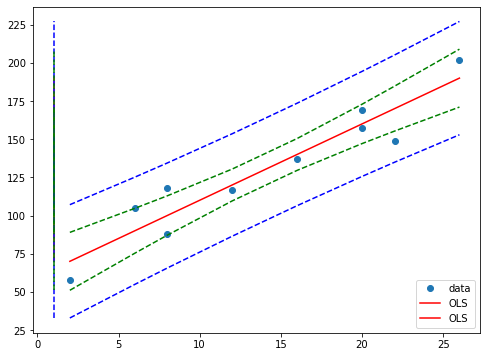

In [50]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='data')
ax.plot(X, fitted_values, 'r-', label='OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc='best')
plt.show()